# DirectLiNGAM by Kernel Method

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.26.3', '2.2.2', '0.20.3', '1.8.3']


## Test data
We create test data consisting of 6 variables.

In [5]:
n = 1000
e = lambda n: np.random.laplace(0, 1, n)
x3 = e(n)
x2 = 0.3*x3 + e(n)
x1 = 0.3*x3 + 0.3*x2 + e(n)
x0 = 0.3*x2 + 0.3*x1 + e(n)
x4 = 0.3*x1 + 0.3*x0 + e(n)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4'])
#X.head()
X

,x0,x1,x2,x3,x4
0,-1.418654,0.120554,-0.746230,0.686243,-0.833859
1,-1.331029,0.569770,-0.873070,-1.020526,-0.922058
2,-1.119456,-0.487617,-0.432181,-0.250969,-3.260397
3,-0.849860,-1.278822,-1.672980,-2.587599,0.591868
4,-1.409522,-3.253269,-1.041908,-3.747548,-3.305862
...,...,...,...,...,...
995,0.293434,0.382182,-0.398677,-1.318776,-0.199938
996,-0.227366,-2.242093,-1.841319,-1.429256,-1.679893
997,2.738866,1.111529,0.959117,-0.674378,1.222177
998,1.799623,1.154692,2.490837,1.069567,0.596254


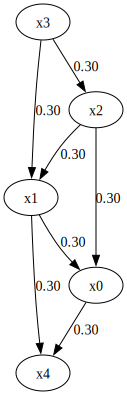

In [6]:
m = np.array([[0.0, 0.3, 0.3, 0.0, 0.0],
              [0.0, 0.0, 0.3, 0.3, 0.0],
              [0.0, 0.0, 0.0, 0.3, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0],
              [0.3, 0.3, 0.0, 0.0, 0.0]])

make_dot(m)

## Causal Discovery
To run causal discovery, we create a `DirectLiNGAM` object by specifying 'kernel' in the `measure` parameter. Then, we call the `fit` method. 

In [7]:
model = lingam.DirectLiNGAM(measure='kernel')
model.fit(X)

KeyboardInterrupt: 

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [5]:
model.causal_order_

[3, 2, 1, 0, 4]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [6]:
model.adjacency_matrix_

array([[0.   , 0.34 , 0.273, 0.   , 0.   ],
       [0.   , 0.   , 0.304, 0.275, 0.   ],
       [0.   , 0.   , 0.   , 0.261, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.26 , 0.239, 0.   , 0.   , 0.   ]])

We can draw a causal graph by utility funciton.

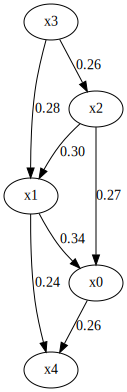

In [7]:
make_dot(model.adjacency_matrix_)